In [1]:
import os
from scipy import io
import numpy as np

data = io.loadmat(os.path.join('..', 'DATA', 'allFaces.mat'))

In [2]:
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Thu Sep  4 19:53:55 2014',
 '__version__': '1.0',
 '__globals__': [],
 'faces': array([[80, 94, 59, ...,  3,  4,  4],
        [81, 87, 67, ...,  4,  4,  3],
        [80, 88, 66, ...,  2,  4,  4],
        ...,
        [14,  7,  6, ...,  0,  1,  1],
        [14,  9,  6, ...,  1,  1,  0],
        [11,  8,  7, ...,  1,  1,  2]], dtype=uint8),
 'n': array([[192]], dtype=uint8),
 'm': array([[168]], dtype=uint8),
 'sub': array([[(array([[39]], dtype=uint8), array([[70, 84, 88, ...,  3,  4,  4],
                [74, 83, 95, ...,  4,  4,  3],
                [69, 82, 97, ...,  2,  4,  4],
                ...,
                [ 1,  2,  3, ...,  0,  1,  1],
                [ 1,  3,  3, ...,  1,  1,  0],
                [ 2,  2,  3, ...,  1,  1,  2]], dtype=uint8), array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          

In [3]:
faces = data['faces']
nfaces = data['nfaces']
m = int(data['m'])
n = int(data['n'])

/var/folders/h3/qyrdxv051fz35f8dd5n618b00000gn/T/ipykernel_5932/2276977602.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  m = int(data['m'])
/var/folders/h3/qyrdxv051fz35f8dd5n618b00000gn/T/ipykernel_5932/2276977602.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  n = int(data['n'])


In [4]:
print(faces.shape)
print(m * n)
print(np.sum(nfaces))

(32256, 2410)
32256
2410


In [5]:
U_hat, S_hat, VT_hat = np.linalg.svd(faces, full_matrices=False)

In [6]:
C = faces.T @ faces

In [7]:
S_squared, V = np.linalg.eig(C)

In [8]:
S = np.sqrt(S_squared)

/var/folders/h3/qyrdxv051fz35f8dd5n618b00000gn/T/ipykernel_5932/240609344.py:1: RuntimeWarning: invalid value encountered in sqrt
  S = np.sqrt(S_squared)


In [9]:
U = faces @ V @ np.diag(S).T

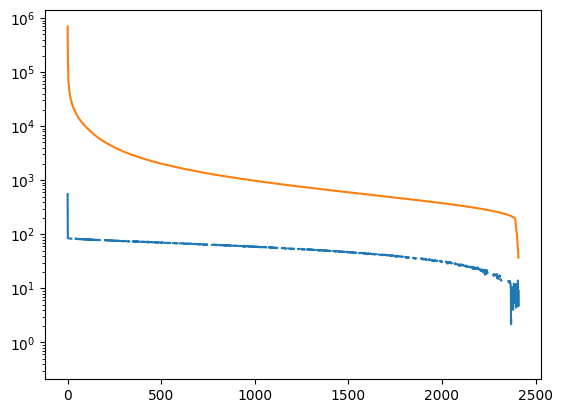

In [12]:
import matplotlib.pyplot as plt
plt.semilogy(S)
plt.semilogy(S_hat)

In [16]:
print(U_hat.shape)
print(n * m)

(32256, 2410)
32256


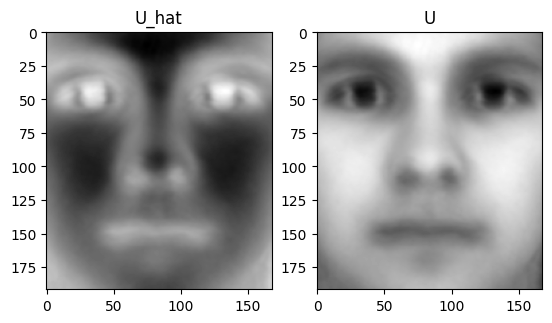

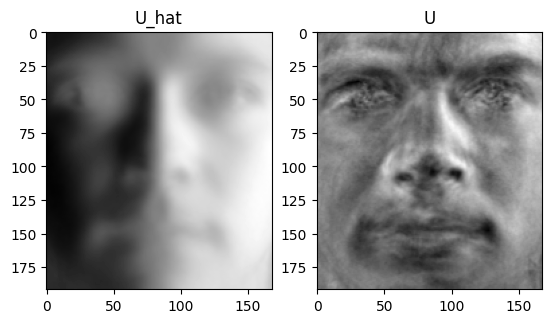

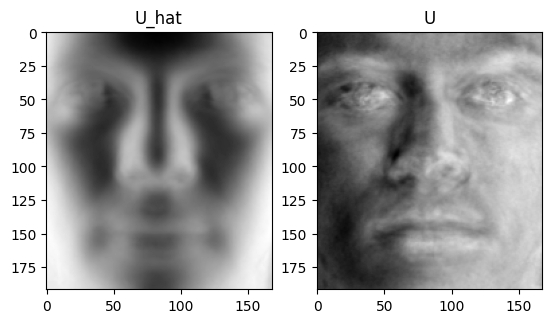

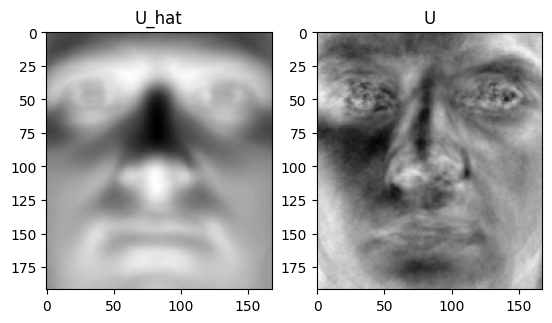

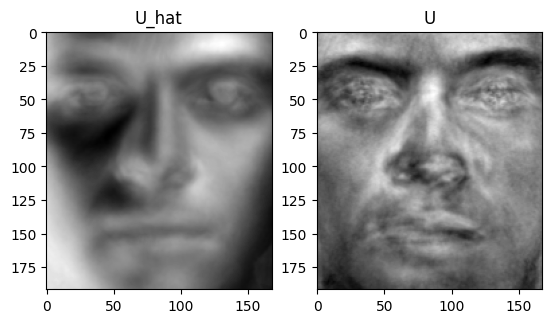

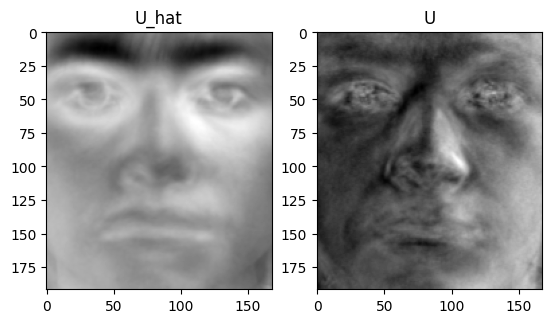

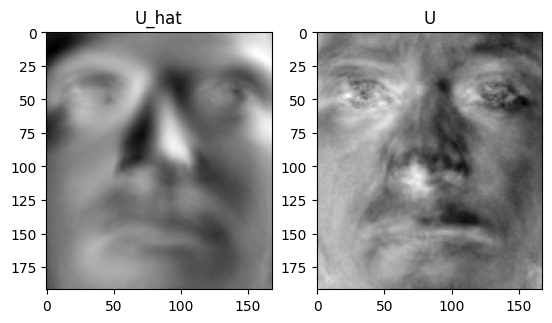

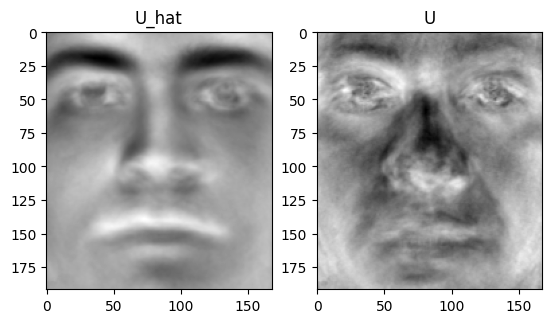

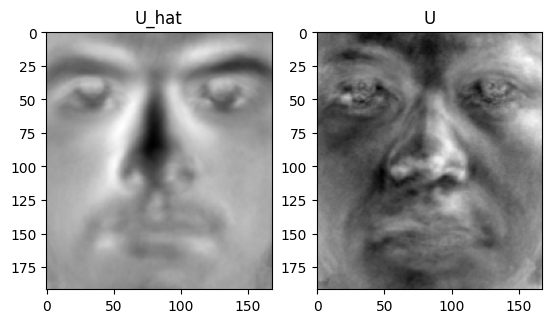

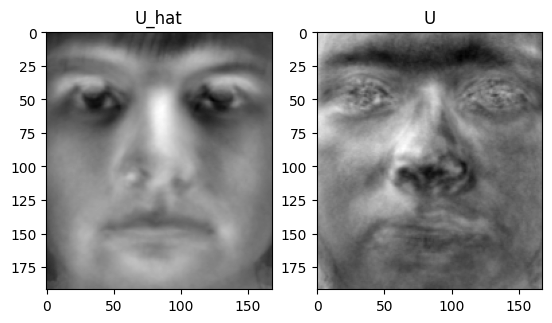

In [25]:
def compare_results(start, stop):
    for i in range(start, stop):
        fig, axs = plt.subplots(1, 2)
        axs[0].imshow(U_hat[:, i].reshape(m, n).T, cmap="gray")
        axs[0].set_title('U_hat')
        axs[1].imshow(U[:, i].reshape(m, n).T, cmap="gray")
        axs[1].set_title('U')
        plt.show()

compare_results(0, 10)

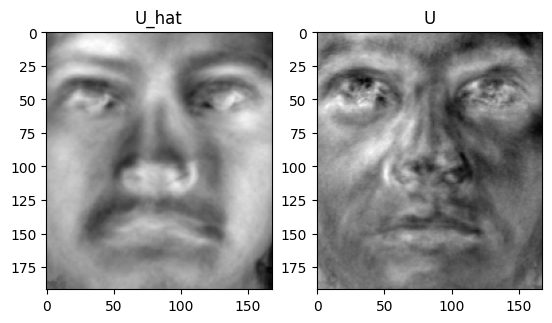

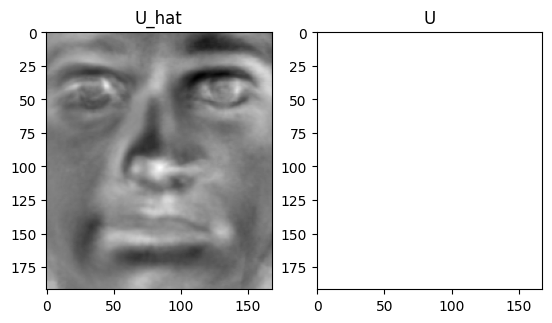

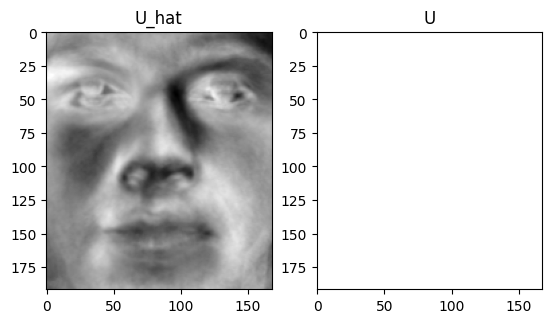

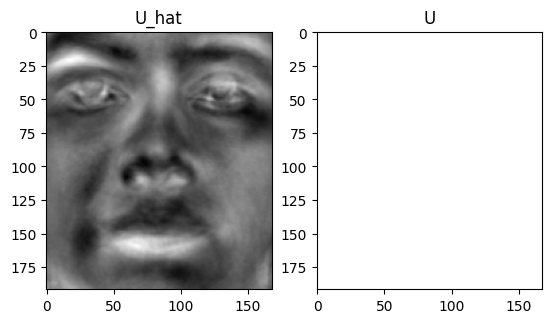

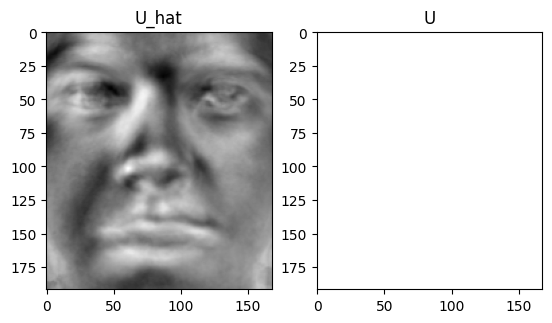

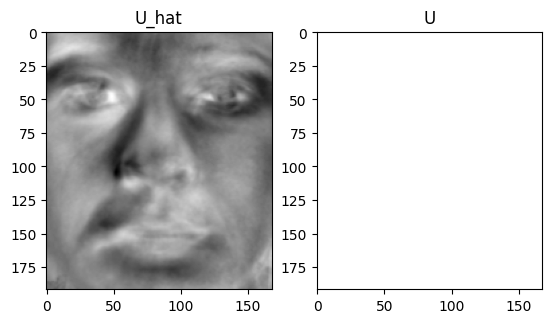

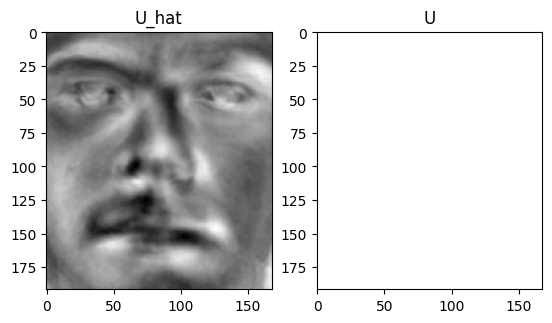

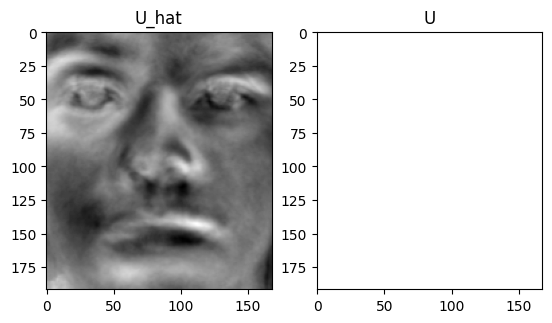

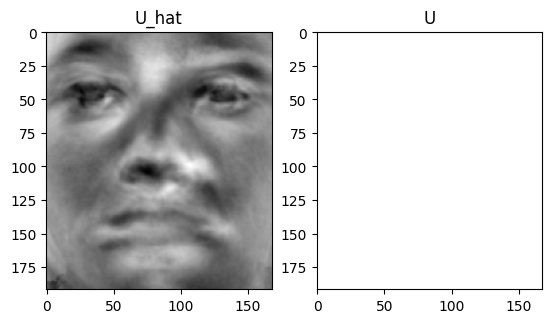

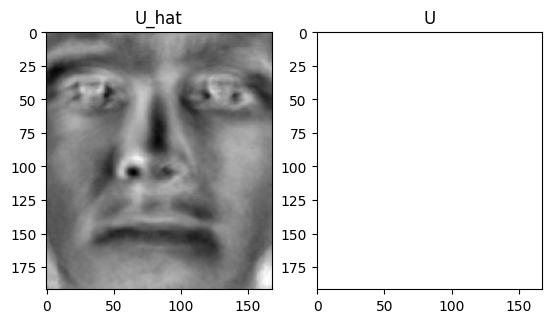

In [27]:
compare_results(20, 30)